# read x*

['train_loss', 'train_acc', 'val_loss', 'val_acc', 'para_weights']
(1, 112)


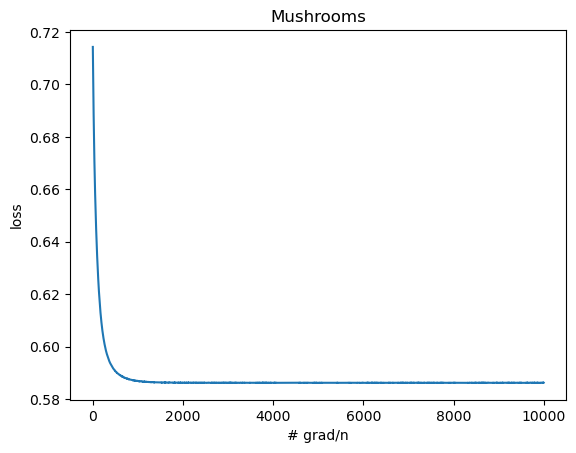

['train_loss', 'train_acc', 'para_weights', 'val_loss', 'val_acc']
(1000, 1, 68)


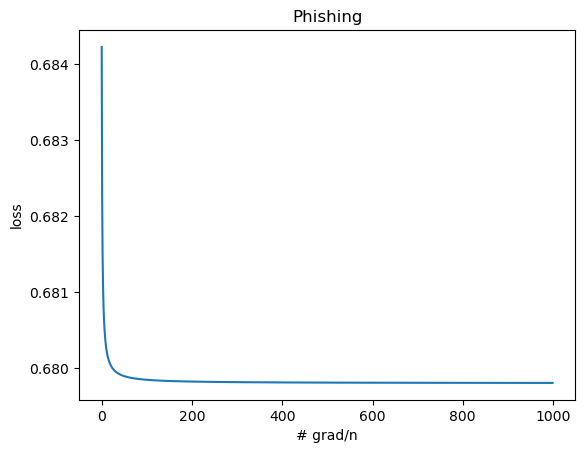

['train_loss', 'train_acc', 'val_loss', 'val_acc', 'para_weights']
(1, 300)


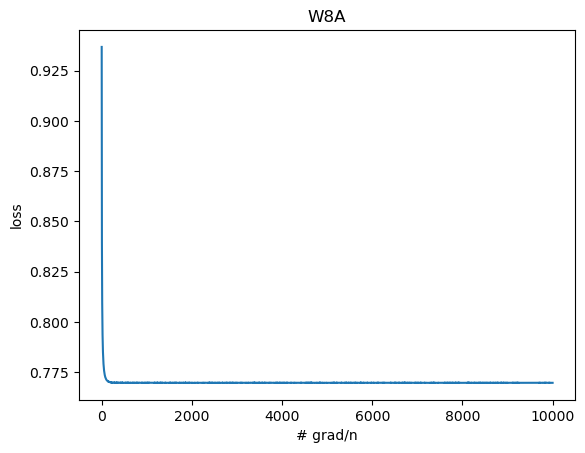

['train_loss', 'train_acc', 'para_weights', 'val_loss', 'val_acc']
(50, 1, 22)


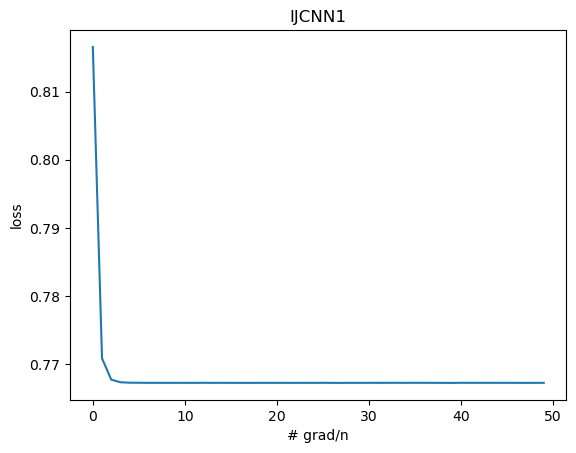

['train_loss', 'train_acc', 'para_weights', 'val_loss', 'val_acc']
(1000, 1, 10)


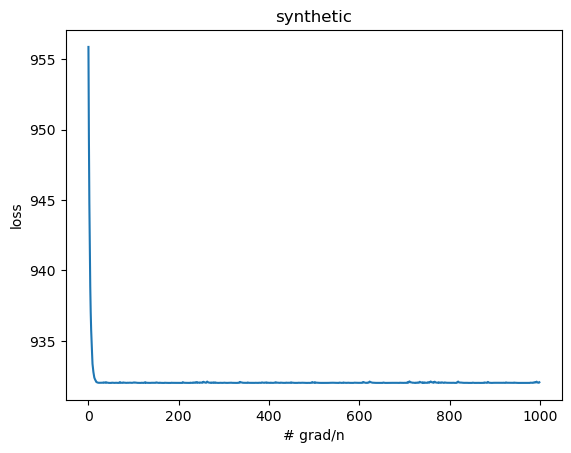

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# path = {
#     'Mushrooms': 'outputs/20221230-020704_SGD/train_stats.npz',
#     'Phishing': 'outputs/20221230-020746_SGD/train_stats.npz',
#     'W8A': 'outputs/20221230-020831_SGD/train_stats.npz',
#     'IJCNN1': 'outputs/20221230-021152_SGD/train_stats.npz'
# }

# path = {
#     'Mushrooms': 'outputs/20221230-044346_SVRG/train_stats.npz',
#     'Phishing': 'outputs/20221230-044806_SVRG/train_stats.npz',
#     'W8A': 'outputs/20221230-045244_SVRG/train_stats.npz',
#     'IJCNN1': 'outputs/20221230-051725_SVRG/train_stats.npz'
# }

# path = {
#     'Mushrooms': 'outputs/20221230-133106_GD/train_stats.npz',
#     'Phishing': 'outputs/20221230-133300_GD/train_stats.npz',
#     'W8A': 'outputs/20221230-133417_GD/train_stats.npz',
#     'IJCNN1': 'outputs/20221230-134239_GD/train_stats.npz'
# }

path = {
    'Mushrooms': 'outputs/optimal_mushrooms/train_stats.npz',
    # 'Phishing': 'outputs/20221230-133300_GD/train_stats.npz',
    'Phishing': 'outputs/20221230-203000_SGD/train_stats.npz',
    'W8A': 'outputs/optimal_w8a/train_stats.npz',
    # 'IJCNN1': 'outputs/optimal_IJCNN1/train_stats.npz'
    # 'IJCNN1': 'outputs/20221230-134239_GD/train_stats.npz'
    # 'IJCNN1': 'outputs/20221230-201016_SGD/train_stats.npz'
    # 'IJCNN1': 'outputs/20221230-205243_GD/train_stats.npz'
    'IJCNN1': 'outputs/20221230-022319_SGD/train_stats.npz',
    'synthetic': 'outputs/20221230-214045_SGD/train_stats.npz'
}

weights = {}
legends = []

for dataset, filename in path.items():
    npObject = np.load(filename)
    print(list(npObject.keys()))
    if 'para_weights' in npObject.keys():
        print(npObject['para_weights'].shape)
        weights.update({dataset: npObject['para_weights'][-1].reshape(-1)})
    else:
        print(npObject['para_weight'].shape)
        weights.update({dataset: npObject['para_weight'][-1].reshape(-1)})
    y = npObject['train_loss']
    x = np.arange(y.shape[0])
    plt.title(dataset)
    plt.xlabel('# grad/n')
    plt.ylabel('loss')
    plt.plot(x, y)
    plt.show()


# experiment with fixed step size

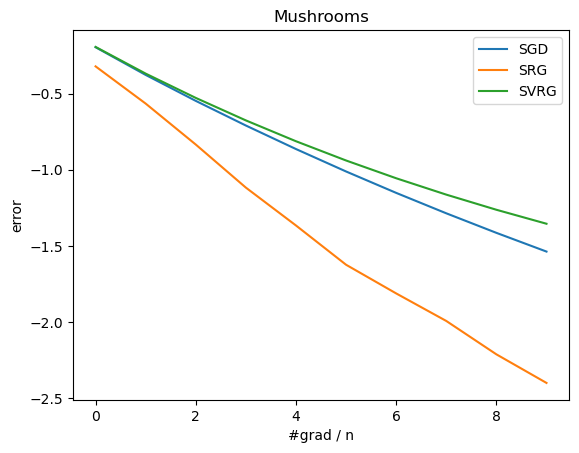

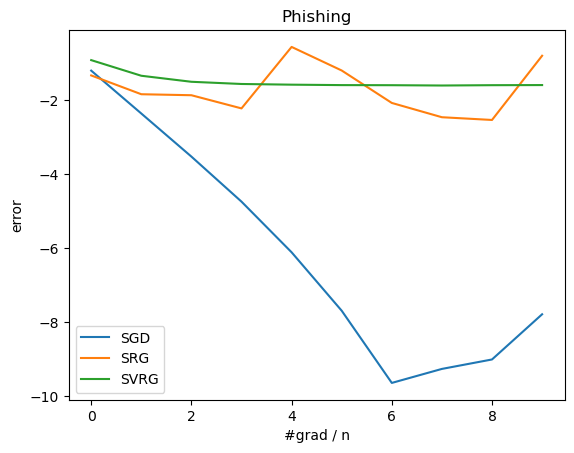

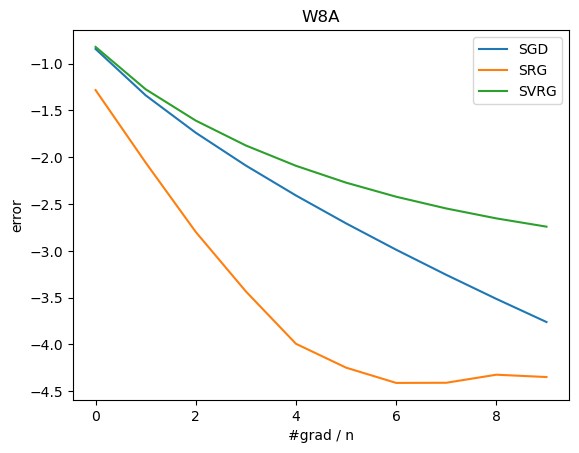

/tmp/ipykernel_2358582/1023677705.py:36: RuntimeWarning: divide by zero encountered in log
  y = np.log(y)


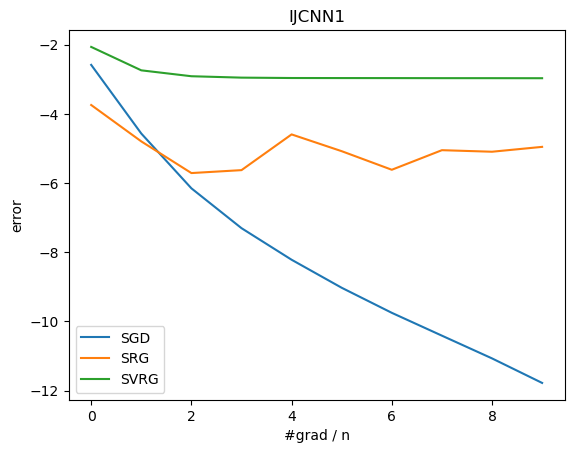

In [69]:
import matplotlib.pyplot as plt
import numpy as np

to_draw = {
    'Mushrooms': {
        'SGD': 'outputs/20221230-022229_SGD/train_stats.npz',
        'SRG': 'outputs/20221230-192453_SRG/train_stats.npz',
        'SVRG': 'outputs/20221230-022524_SVRG/train_stats.npz'
    }, 
    'Phishing': {
        'SGD': 'outputs/20221230-022238_SGD/train_stats.npz',
        'SRG': 'outputs/20221230-192853_SRG/train_stats.npz',
        'SVRG': 'outputs/20221230-022537_SVRG/train_stats.npz'
    },
    'W8A': {
        'SGD': 'outputs/20221230-022249_SGD/train_stats.npz',
        'SRG': 'outputs/20221230-193123_SRG/train_stats.npz',
        'SVRG': 'outputs/20221230-022556_SVRG/train_stats.npz'
    },
    'IJCNN1': {
        'SGD': 'outputs/20221230-022319_SGD/train_stats.npz',
        'SRG': 'outputs/20221230-195044_SRG/train_stats.npz',
        'SVRG': 'outputs/20221230-022647_SVRG/train_stats.npz'
    },
    'synthetic': {
        'SGD': 'outputs/20221230-214045_SGD/train_stats.npz',
        'SRG': '',
        'SVRG': ''
    }
}

for title, dict_ in to_draw.items():
    legends = []
    for algo, filename in dict_.items():
        npObject = np.load(filename)
        legends.append(algo)
        y = npObject['para_weights']
        y = y.reshape(-1, y.shape[-1])
        y = np.linalg.norm(y - weights[title], axis = -1)
        y =  (y / np.linalg.norm(weights[title]))**2
        y = np.log(y)
        x = np.arange(y.shape[0])
        plt.plot(x[:10], y[:10])
        # plt.plot(x, y)

    plt.legend(legends)
    plt.ylabel('error')
    plt.xlabel('#grad / n')
    plt.title(title)
    plt.show()



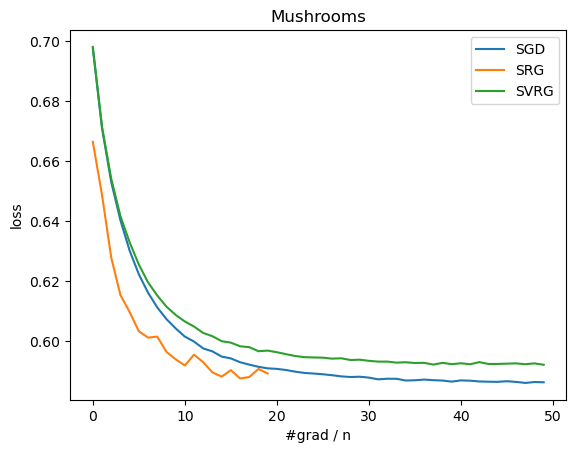

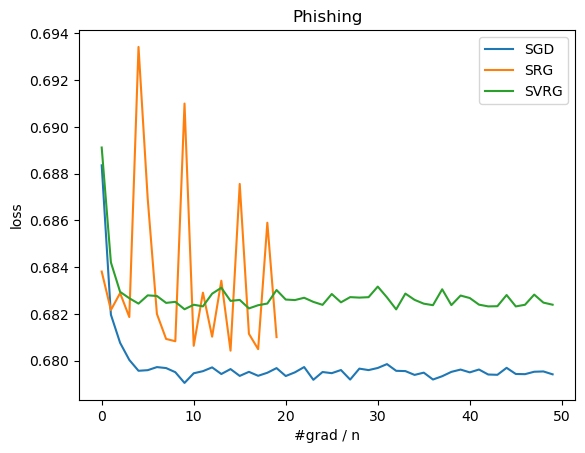

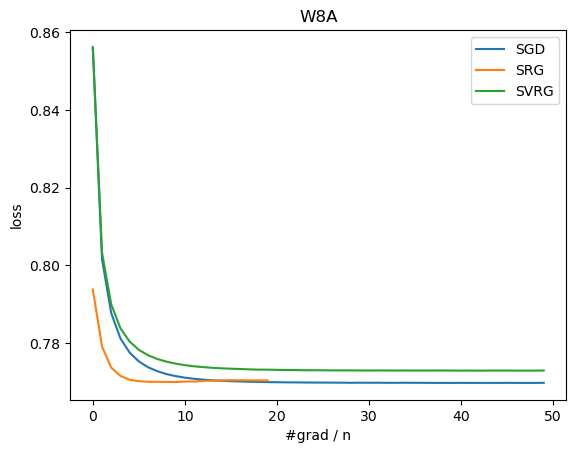

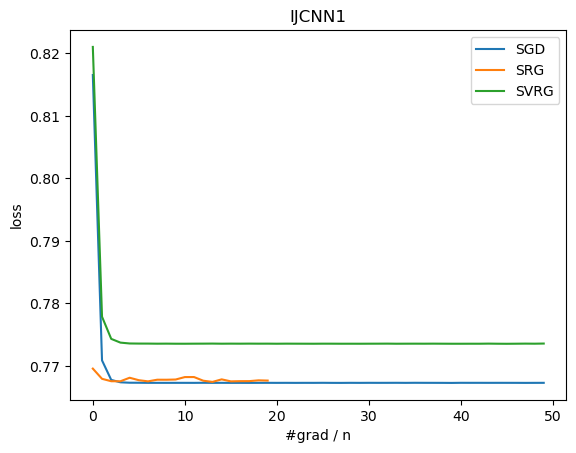

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# to_draw = {
#     'Mushrooms': {
#         'SGD': 'outputs/20221230-022229_SGD/train_stats.npz',
#         'SRG': 'outputs/20221230-022914_SRG/train_stats.npz',
#         'SVRG': 'outputs/20221230-022524_SVRG/train_stats.npz'
#     }, 
#     'Phishing': {
#         'SGD': 'outputs/20221230-022238_SGD/train_stats.npz',
#         'SRG': 'outputs/20221230-022948_SRG/train_stats.npz',
#         'SVRG': 'outputs/20221230-022537_SVRG/train_stats.npz'
#     },
#     'W8A': {
#         'SGD': 'outputs/20221230-022249_SGD/train_stats.npz',
#         'SRG': 'outputs/20221230-023045_SRG/train_stats.npz',
#         'SVRG': 'outputs/20221230-022556_SVRG/train_stats.npz'
#     },
#     'IJCNN1': {
#         'SGD': 'outputs/20221230-022319_SGD/train_stats.npz',
#         'SRG': 'outputs/20221230-025242_SRG/train_stats.npz',
#         'SVRG': 'outputs/20221230-022647_SVRG/train_stats.npz'
#     }
# }

for title, dict_ in to_draw.items():
    legends = []
    for algo, filename in dict_.items():
        npObject = np.load(filename)
        legends.append(algo)
        y = npObject['train_loss']
        x = np.arange(y.shape[0])
        plt.plot(x, y)

    plt.legend(legends)
    plt.ylabel('loss')
    plt.xlabel('#grad / n')
    plt.title(title)
    plt.show()

